In [ ]:
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.base import BaseEstimator, ClassifierMixin

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

import numpy as np
import pandas as pd

# Exploratory Data Analysis

In [ ]:
dataset = load_iris()

print(type(dataset))
for key in enumerate(dataset.keys()):
  print(key)

<class 'sklearn.utils._bunch.Bunch'>
(0, 'data')
(1, 'target')
(2, 'frame')
(3, 'target_names')
(4, 'DESCR')
(5, 'feature_names')
(6, 'filename')
(7, 'data_module')


In [ ]:
#load iris dataset
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# add 'iris type' column
df['iris type'] = dataset['target']
# assign names
df['iris name'] = df['iris type'].apply(lambda x: 'setosa' if x == 0 else ('versicolor' if x == 1 else 'virginica'))
# drop type column
df.drop(['iris type'], axis = 1, inplace = True)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   iris name          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: >

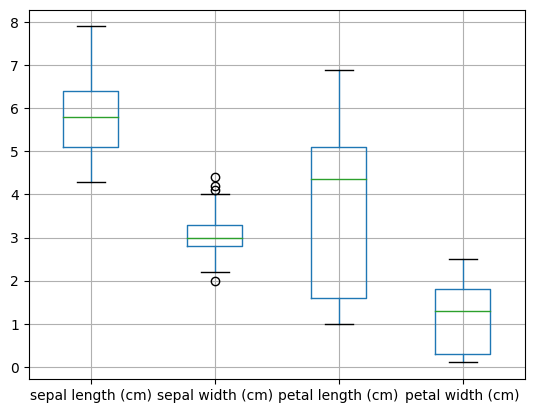

In [ ]:
#box plot
df.boxplot()

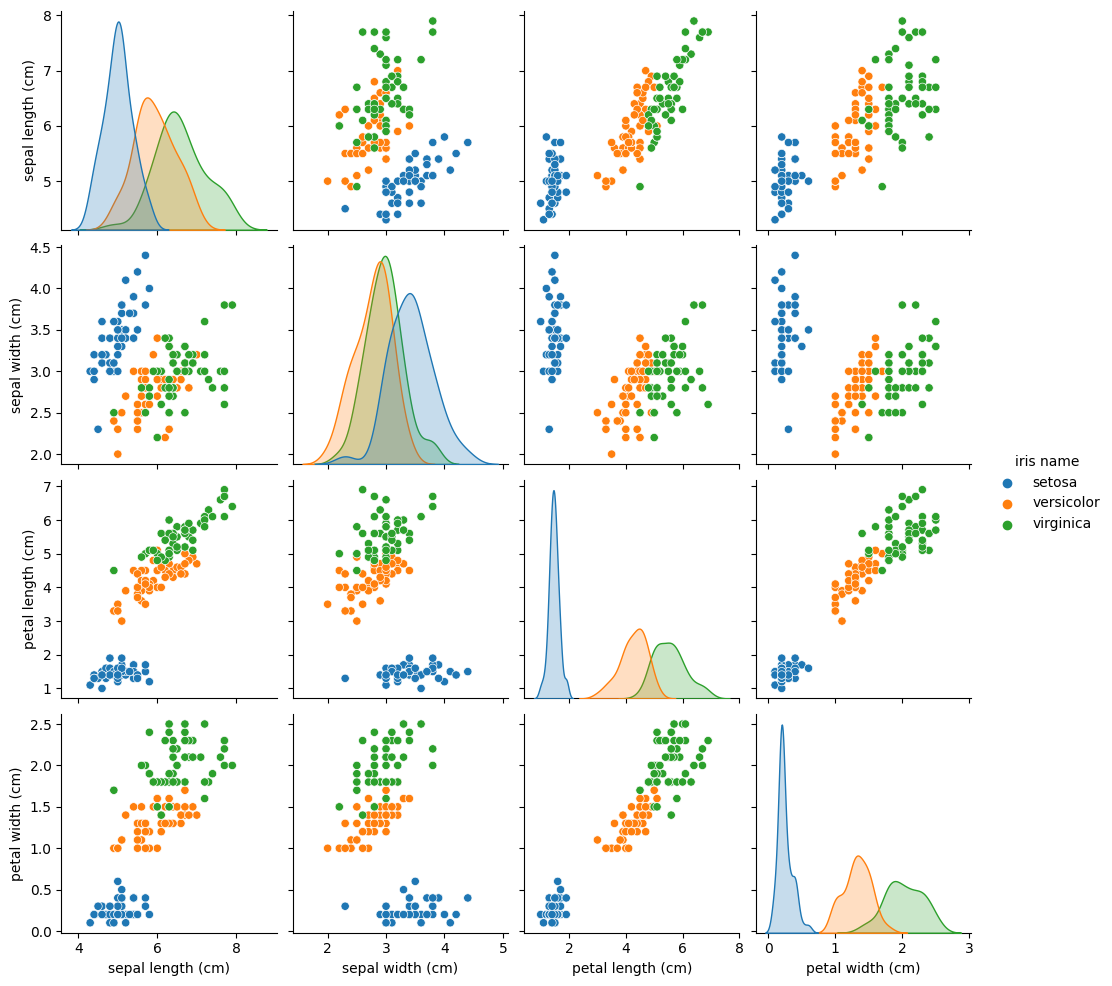

In [ ]:
#pairplot
sns.pairplot(df, hue="iris name")

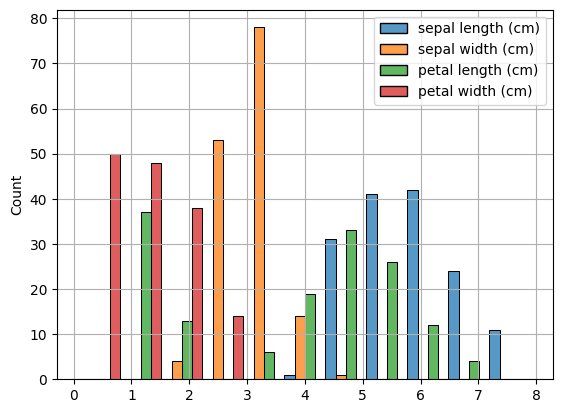

In [ ]:
#histogram
sns.histplot(data=df, multiple="dodge")
plt.grid()

# Data Pre-Processing

## Splitting the dataset

In [ ]:
X = dataset.data
y = dataset.target

In [ ]:
#split dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size = 0.20
)

# K-Fold Cross-Validation

In [ ]:
# Define the number of folds (K)
num_folds = 3

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Cross-validation for KNN

## KKN with Euclidean Distance

In [ ]:
def euclidean_distance(x, y):
    if x.ndim == 1:
        return np.sqrt(np.sum((x - y)**2))
    elif x.ndim == 2:
        return np.sqrt(np.sum((x - y)**2, axis=1))
    else:
        raise ValueError("Input arrays must be 1D or 2D.")

In [ ]:
class KNNEuclidean(BaseEstimator, ClassifierMixin):
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        return self

    def predict(self, X):
        y_preds = []
        for i in range(X.shape[0]):
            distances = np.array([euclidean_distance(self.X_train[j, :], X[i, :]) for j in range(self.X_train.shape[0])])
            # sort from nearest to furthest
            indices = np.argsort(distances)
            # retrieve classes of the k nearest data points
            nearest_classes = y_train[indices[:self.k]]
            # count number of points for each class
            counter = Counter(nearest_classes)
            # output (or predict) the class which has the most count
            y_pred = counter.most_common(1)[0][0]
            y_preds.append( y_pred )
        return np.array(y_preds)

## KNN with Manhatten Distance

In [ ]:
def manhattan_distance(x, y):
    if x.ndim == 1:
        return np.sum(np.abs(x - y))
    elif x.ndim == 2:
        return np.sum(np.abs(x - y), axis=1)
    else:
        raise ValueError("Input arrays must be 1D or 2D.")

In [ ]:
class KNNManhatten(BaseEstimator, ClassifierMixin):
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        return self

    def predict(self, X):
        y_preds = []
        for i in range(X.shape[0]):
            distances = np.array([manhattan_distance(self.X_train[j, :], X[i, :]) for j in range(self.X_train.shape[0])])
            # sort from nearest to furthest
            indices = np.argsort(distances)
            # retrieve classes of the k nearest data points
            nearest_classes = y_train[indices[:self.k]]
            # count number of points for each class
            counter = Counter(nearest_classes)
            # output (or predict) the class which has the most count
            y_pred = counter.most_common(1)[0][0]
            y_preds.append( y_pred )
        return np.array(y_preds)

In [ ]:
# Create an instance of your KNN wrapper class
KNNModelE = KNNEuclidean(k=3)
KNNModelM = KNNManhatten(k=3)

# Perform K-fold cross-validation
cross_val_results_e = cross_val_score(KNNModelE, X, y, cv=kf, scoring='accuracy')
cross_val_results_m = cross_val_score(KNNModelM, X, y, cv=kf, scoring='accuracy')


# Print the cross-validation results
print("Result for KNN with Euclidean distance")
print("Cross-Validation Results:", cross_val_results_e)
print("Average Accuracy:", cross_val_results_e.mean())
print()
print("Result for KNN with Manhatten distance")
print("Cross-Validation Results:", cross_val_results_m)
print("Average Accuracy:", cross_val_results_m.mean())

Result for KNN with Euclidean distance
Cross-Validation Results: [0.22 0.2  0.14]
Average Accuracy: 0.18666666666666668

Result for KNN with Manhatten distance
Cross-Validation Results: [0.26 0.28 0.14]
Average Accuracy: 0.22666666666666668


## Number of k

In [ ]:
KNNModelM1 = KNNManhatten(k=1)
KNNModelM2 = KNNManhatten(k=2)
KNNModelM3 = KNNManhatten(k=3)
KNNModelM4 = KNNManhatten(k=4)
KNNModelM5 = KNNManhatten(k=5)

In [ ]:
cross_val_results = cross_val_score(KNNModelM1, X, y, cv=kf, scoring='accuracy')
print("k = 1")
print("Cross-Validation Results:", cross_val_results_e)
print("Average Accuracy:", cross_val_results_e.mean())
print()
cross_val_results = cross_val_score(KNNModelM2, X, y, cv=kf, scoring='accuracy')
print("k = 2")
print("Cross-Validation Results:", cross_val_results_e)
print("Average Accuracy:", cross_val_results_e.mean())
print()
cross_val_results = cross_val_score(KNNModelM3, X, y, cv=kf, scoring='accuracy')
print("k = 3")
print("Cross-Validation Results:", cross_val_results_e)
print("Average Accuracy:", cross_val_results_e.mean())
print()
cross_val_results = cross_val_score(KNNModelM4, X, y, cv=kf, scoring='accuracy')
print("k = 4")
print("Cross-Validation Results:", cross_val_results_e)
print("Average Accuracy:", cross_val_results_e.mean())
print()
cross_val_results = cross_val_score(KNNModelM5, X, y, cv=kf, scoring='accuracy')
print("k = 5")
print("Cross-Validation Results:", cross_val_results_e)
print("Average Accuracy:", cross_val_results_e.mean())

k = 1
Cross-Validation Results: [0.22 0.2  0.14]
Average Accuracy: 0.18666666666666668

k = 2
Cross-Validation Results: [0.22 0.2  0.14]
Average Accuracy: 0.18666666666666668

k = 3
Cross-Validation Results: [0.22 0.2  0.14]
Average Accuracy: 0.18666666666666668

k = 4
Cross-Validation Results: [0.22 0.2  0.14]
Average Accuracy: 0.18666666666666668

k = 5
Cross-Validation Results: [0.22 0.2  0.14]
Average Accuracy: 0.18666666666666668


# Cross-validation for Decision Tree

### Comparing minimum samples split

In [ ]:
DTmodelmin2 = DecisionTreeClassifier(min_samples_split=2)
DTmodelmin2.fit(X_train, y_train)

DTmodelmin3 = DecisionTreeClassifier(min_samples_split=3)
DTmodelmin3.fit(X_train, y_train)

DTmodelmin4 = DecisionTreeClassifier(min_samples_split=4)
DTmodelmin4.fit(X_train, y_train)

DTmodelmin5 = DecisionTreeClassifier(min_samples_split=5)
DTmodelmin5.fit(X_train, y_train)

DTmodelmin6 = DecisionTreeClassifier(min_samples_split=6)
DTmodelmin6.fit(X_train, y_train)

DTmodelmin7 = DecisionTreeClassifier(min_samples_split=7)
DTmodelmin7.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=7)

In [ ]:
cross_val_results2 = cross_val_score(DTmodelmin2, X, y, cv=kf, scoring='accuracy')
print("Minimum sample split = 2")
print("Cross-Validation Results:", cross_val_results2)
print("Average Accuracy:", cross_val_results2.mean())
print()
cross_val_results3 = cross_val_score(DTmodelmin3, X, y, cv=kf, scoring='accuracy')
print("Minimum sample split = 3")
print("Cross-Validation Results:", cross_val_results3)
print("Average Accuracy:", cross_val_results3.mean())
print()
cross_val_results4 = cross_val_score(DTmodelmin4, X, y, cv=kf, scoring='accuracy')
print("Minimum sample split = 4")
print("Cross-Validation Results:", cross_val_results4)
print("Average Accuracy:", cross_val_results4.mean())
print()
cross_val_results5 = cross_val_score(DTmodelmin5, X, y, cv=kf, scoring='accuracy')
print("Minimum sample split = 5")
print("Cross-Validation Results:", cross_val_results5)
print("Average Accuracy:", cross_val_results5.mean())
print()
cross_val_results6 = cross_val_score(DTmodelmin6, X, y, cv=kf, scoring='accuracy')
print("Minimum sample split = 6")
print("Cross-Validation Results:", cross_val_results6)
print("Average Accuracy:", cross_val_results6.mean())
print()
cross_val_results7 = cross_val_score(DTmodelmin6, X, y, cv=kf, scoring='accuracy')
print("Minimum sample split = 7")
print("Cross-Validation Results:", cross_val_results7)
print("Average Accuracy:", cross_val_results7.mean())

Minimum sample split = 2
Cross-Validation Results: [1.   0.92 0.92]
Average Accuracy: 0.9466666666666667

Minimum sample split = 3
Cross-Validation Results: [0.98 0.92 0.9 ]
Average Accuracy: 0.9333333333333332

Minimum sample split = 4
Cross-Validation Results: [0.98 0.92 0.9 ]
Average Accuracy: 0.9333333333333332

Minimum sample split = 5
Cross-Validation Results: [0.98 0.92 0.9 ]
Average Accuracy: 0.9333333333333332

Minimum sample split = 6
Cross-Validation Results: [0.98 0.92 0.92]
Average Accuracy: 0.94

Minimum sample split = 7
Cross-Validation Results: [0.98 0.92 0.92]
Average Accuracy: 0.94


## Maximum depth

In [ ]:
DTmodeldepth2 = DecisionTreeClassifier(min_samples_split=2, max_depth=2)
DTmodeldepth2.fit(X_train, y_train)

DTmodeldepth4 = DecisionTreeClassifier(min_samples_split=2, max_depth=4)
DTmodeldepth4.fit(X_train, y_train)

DTmodeldepth6 = DecisionTreeClassifier(min_samples_split=2, max_depth=6)
DTmodeldepth6.fit(X_train, y_train)

DTmodeldepth8 = DecisionTreeClassifier(min_samples_split=2, max_depth=8)
DTmodeldepth8.fit(X_train, y_train)

DTmodeldepth10 = DecisionTreeClassifier(min_samples_split=2, max_depth=10)
DTmodeldepth10.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
cross_val_results = cross_val_score(DTmodeldepth2, X, y, cv=kf, scoring='accuracy')
print("Maximum depth = 2")
print("Cross-Validation Results:", cross_val_results)
print("Average Accuracy:", cross_val_results.mean())
print()
cross_val_results = cross_val_score(DTmodeldepth4, X, y, cv=kf, scoring='accuracy')
print("Maximum depth = 4")
print("Cross-Validation Results:", cross_val_results)
print("Average Accuracy:", cross_val_results.mean())
print()
cross_val_results = cross_val_score(DTmodeldepth6, X, y, cv=kf, scoring='accuracy')
print("Maximum depth = 6")
print("Cross-Validation Results:", cross_val_results)
print("Average Accuracy:", cross_val_results.mean())
print()
cross_val_results = cross_val_score(DTmodeldepth8, X, y, cv=kf, scoring='accuracy')
print("Maximum depth = 8")
print("Cross-Validation Results:", cross_val_results)
print("Average Accuracy:", cross_val_results.mean())
print()
cross_val_results = cross_val_score(DTmodeldepth10, X, y, cv=kf, scoring='accuracy')
print("Maximum depth = 10")
print("Cross-Validation Results:", cross_val_results)
print("Average Accuracy:", cross_val_results.mean())

Maximum depth = 2
Cross-Validation Results: [0.98 0.92 0.92]
Average Accuracy: 0.94

Maximum depth = 4
Cross-Validation Results: [0.98 0.92 0.92]
Average Accuracy: 0.94

Maximum depth = 6
Cross-Validation Results: [1.   0.92 0.94]
Average Accuracy: 0.9533333333333333

Maximum depth = 8
Cross-Validation Results: [1.   0.92 0.94]
Average Accuracy: 0.9533333333333333

Maximum depth = 10
Cross-Validation Results: [1.   0.92 0.92]
Average Accuracy: 0.9466666666666667


# KNN

In [ ]:
KNNModelM3.fit(X_train, y_train)

KNNManhatten(k=3)

In [ ]:
KNNprediction = KNNModelM3.predict(X_test)

In [ ]:
#score
print(metrics.classification_report(y_test, KNNprediction))
print(metrics.confusion_matrix(y_test, KNNprediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.90      1.00      0.95         9
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[ 9  0  0]
 [ 0  9  0]
 [ 0  1 11]]


# Naive Bayes

In [ ]:
NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)

GaussianNB()

In [ ]:
NBprediction = NBmodel.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, NBprediction))
print(metrics.confusion_matrix(y_test, NBprediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      0.89      0.89         9
           2       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30

[[ 9  0  0]
 [ 0  8  1]
 [ 0  1 11]]


# Decision Tree

In [ ]:
DTmodeldepth6.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [ ]:
DTprediction = DTmodeldepth6.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, DTprediction))
print(metrics.confusion_matrix(y_test, DTprediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      0.89      0.89         9
           2       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30

[[ 9  0  0]
 [ 0  8  1]
 [ 0  1 11]]
